#### Problem Statement: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

#### Importing the required libraries

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import joblib

##### import dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Independent Variables:**
Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

**Dependent Variable (Target Variable):
Loan_Status**

### EDA

In [3]:
print('Number of rows x columns in dataset are:',df.shape)

Number of rows x columns in dataset are: (614, 13)


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Analysis on dataset

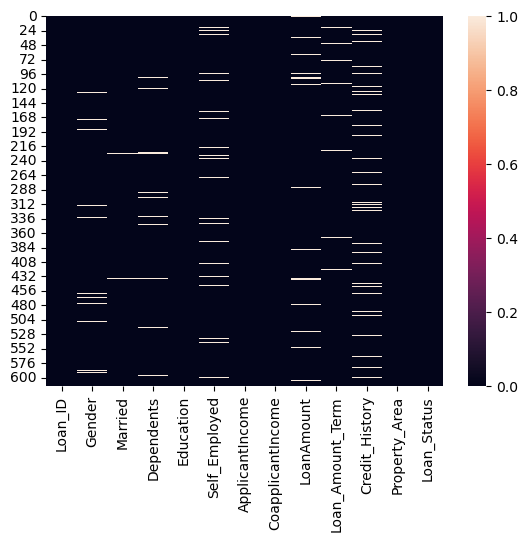

In [5]:
sn.heatmap(df.isna())
plt.show()

In [6]:
df.Loan_ID.value_counts()

LP001974    1
LP001507    1
LP002697    1
LP002807    1
LP002692    1
           ..
LP001357    1
LP001692    1
LP001250    1
LP002837    1
LP002243    1
Name: Loan_ID, Length: 614, dtype: int64

In [7]:
df=df.drop(['Loan_ID'],axis=1)

#### Missing values check

In [8]:
print('Dataset contains any null values:',df.isnull().values.any())

Dataset contains any null values: True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


###### There are 7 object type variables and 5 numeric

#### Univaraite Analysis

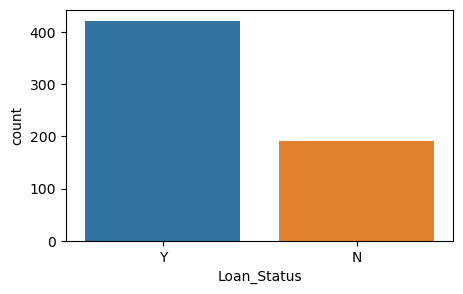

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
plt.figure(figsize = (5,3),facecolor='White')
sn.countplot(x='Loan_Status', data = df)
plt.show()
df['Loan_Status'].value_counts()

#### more than half of the loan applications are approved
Class Imbalance in target variable

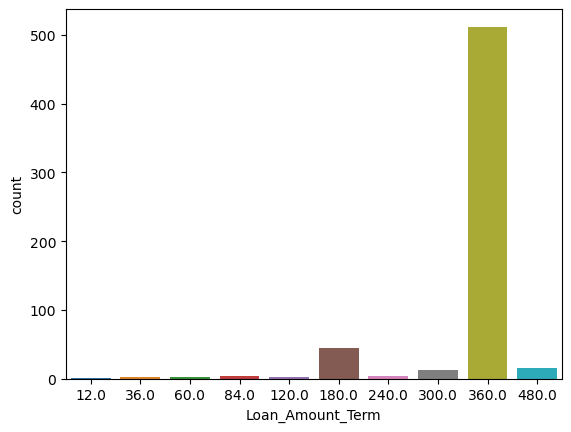

In [11]:
sn.countplot(x='Loan_Amount_Term', data = df)
plt.show()

#### Loan_Amount_Term : 360.0" has the highest loans approved

#### Bivariate analysis

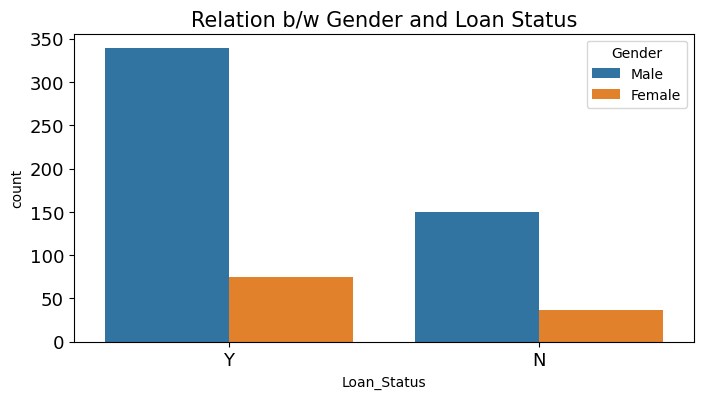

In [12]:
plt.figure(figsize = (8,4),facecolor='White')
sn.countplot(df['Loan_Status'],hue = df['Gender'])
plt.title('Relation b/w Gender and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

#### Male Candidates have higher chance of getting the loan approval and rejection when compared to female candidates

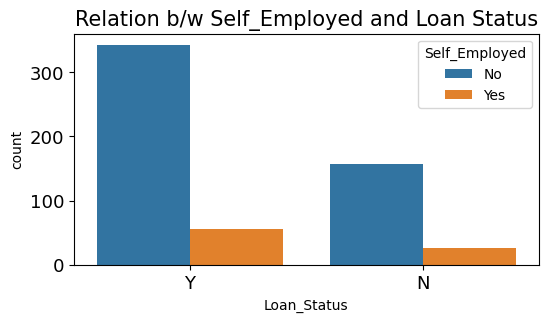

In [13]:
plt.figure(figsize = (6,3),facecolor='White')
sn.countplot(df['Loan_Status'],hue = df['Self_Employed'])
plt.title('Relation b/w Self_Employed and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

#### there are still high chances that a non self employed candidate also gets their loan applications approved

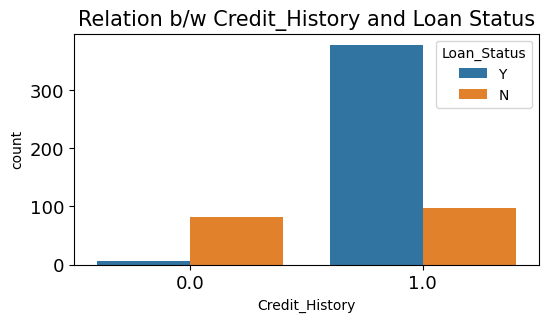

In [14]:
plt.figure(figsize = (6,3),facecolor='White')
sn.countplot(df['Credit_History'],hue=df['Loan_Status'])
plt.title('Relation b/w Credit_History and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

Loan Applications are still approved for the candidates who have previous Credit History

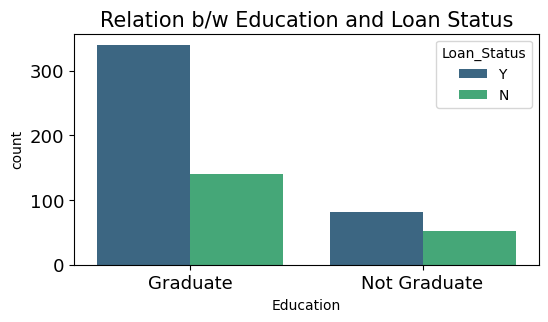

In [15]:
plt.figure(figsize = (6,3),facecolor='White')
sn.countplot(x='Education',data = df,hue="Loan_Status",palette="viridis")
plt.title('Relation b/w Education and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

High Chances of Loan Applications approval of the Graduated candidates when compared to Not Graduated candidates

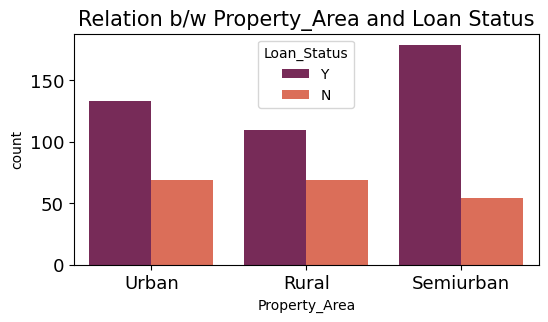

In [16]:
plt.figure(figsize = (6,3),facecolor='White')
sn.countplot(x='Property_Area',data = df,hue="Loan_Status",palette="rocket")
plt.title('Relation b/w Property_Area and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

##### Semiurban area property candidates have high chances of loan approval and Urban property candidates also gets more number of loans approved
**Rural Area candidates have high chances of Loans rejected and less chances of loans approvals when compared to the Semiurban and Urban area property candidates**

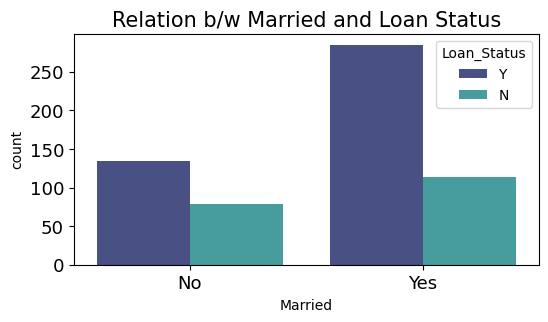

In [17]:
plt.figure(figsize = (6,3),facecolor='White')
sn.countplot(x='Married',data = df,hue="Loan_Status",palette="mako")
plt.title('Relation b/w Married and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

###### Married Candidate's Loan Applications are largely approved when compared to unmarried candidates

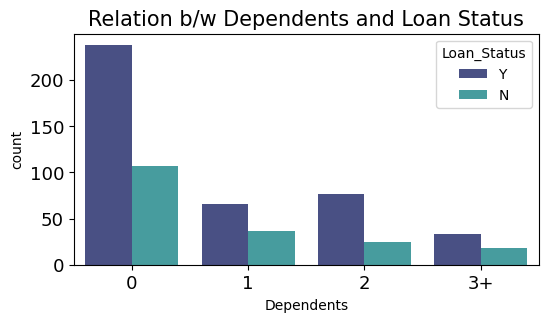

In [18]:
plt.figure(figsize = (6,3),facecolor='White')
sn.countplot(x='Dependents',data = df,hue="Loan_Status",palette="mako")
plt.title('Relation b/w Dependents and Loan Status',fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-Candidates with no dependents, high chances of loan approvals
-Candidates with more than 3 dependents, least chances of loan approvals

#### Multivariate analysis

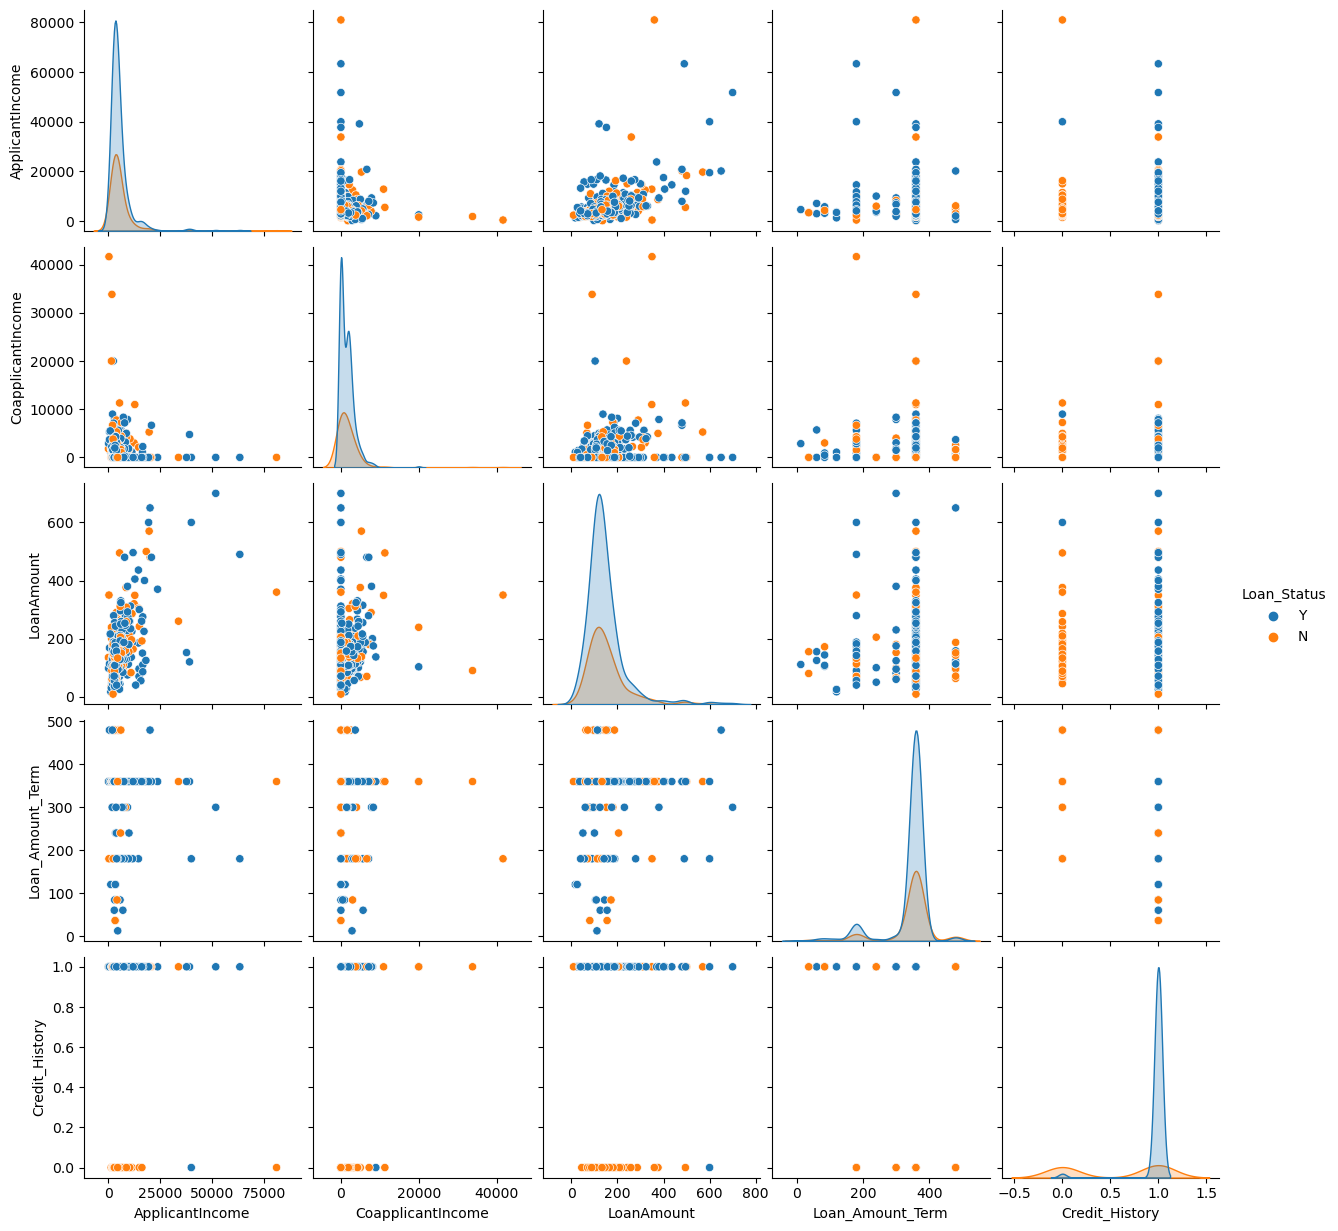

In [19]:
sn.pairplot(df,hue='Loan_Status')
plt.show()

#### Data Cleaning

In [20]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### There are null values in Gender,Married,Dependents,Self employed and Loan Amount etc

In [21]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [22]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [23]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [24]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
df.ApplicantIncome.value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [26]:
df.CoapplicantIncome.value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [27]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

#### Filling Null values

In [29]:
df[['Gender']]=df[['Gender']].fillna(df['Gender'].mode()[0])
df[['Married']]=df[['Married']].fillna(df['Married'].mode()[0])
df[['Dependents']]=df[['Dependents']].fillna(df['Dependents'].mode()[0])
df[['Self_Employed']]=df[['Self_Employed']].fillna(df['Self_Employed'].mode()[0])
df[['Credit_History']]=df[['Credit_History']].fillna(df['Credit_History'].mode()[0])
df[['LoanAmount']]=df[['LoanAmount']].fillna(round(df['LoanAmount'].mean()))
df[['Loan_Amount_Term']]=df[['Loan_Amount_Term']].fillna(round(df['Loan_Amount_Term'].mean()))

#### Checking Null Values

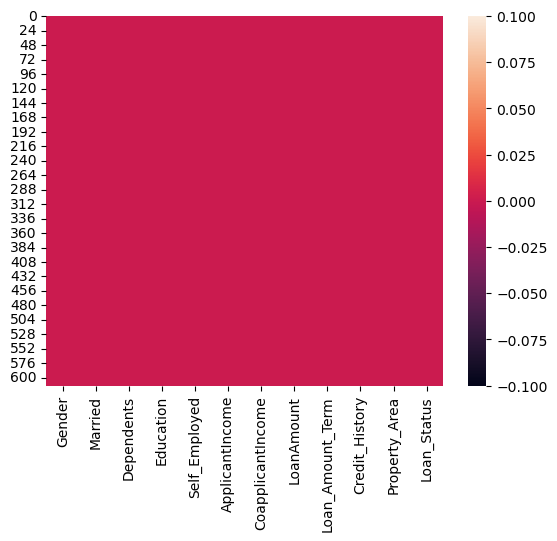

In [30]:
sn.heatmap(df.isna())
plt.show()

#### No missing null values

#### Converting Catergorical to numeric type

In [31]:
dicty={}
for j in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
    for i in df[[j]]:
        dicto={}
        for j in range(len(df[i].unique())):
            dicto[df[i].unique()[j]]=j
        dicty[i]=dicto
dicty

{'Gender': {'Male': 0, 'Female': 1},
 'Married': {'No': 0, 'Yes': 1},
 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
 'Education': {'Graduate': 0, 'Not Graduate': 1},
 'Self_Employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Urban': 0, 'Rural': 1, 'Semiurban': 2},
 'Loan_Status': {'Y': 0, 'N': 1}}

In [32]:
for j in ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']:
    for i in [j]:
        df[i]=df[i].apply(lambda x:dicty[i][x])

In [33]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.397394,342.000000,0.855049,1.050489,0.312704
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037503,64.372489,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### Class Imbalance

In [34]:
print('Number of Loan_Status as yes are:',df['Loan_Status'].value_counts()[0])
print('Number of Loan_Status as no are:',df['Loan_Status'].value_counts()[1])
print('Unbalanced dataset' if df['Loan_Status'].value_counts()[0]!=df['Loan_Status'].value_counts()[1] else 'Balanced dataset')

Number of Loan_Status as yes are: 422
Number of Loan_Status as no are: 192
Unbalanced dataset


In [35]:
dfmin=df[df['Loan_Status']==1]
dfmax=df[df['Loan_Status']==0]
dfminup=resample(dfmin,replace=True,n_samples=422,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of Loan_Status as yes are:',dff['Loan_Status'].value_counts()[0])
print('Number of Loan_Status as no are:',dff['Loan_Status'].value_counts()[1])
print('Unbalanced dataset' if dff['Loan_Status'].value_counts()[0]!=dff['Loan_Status'].value_counts()[1] else 'Balanced dataset')

Number of Loan_Status as yes are: 422
Number of Loan_Status as no are: 422
Balanced dataset


##### Correlation

In [36]:
dff.corr()['Loan_Status']

Gender               0.006167
Married             -0.103228
Dependents           0.010286
Education            0.065618
Self_Employed        0.013765
ApplicantIncome      0.043831
CoapplicantIncome    0.062627
LoanAmount           0.061500
Loan_Amount_Term     0.003686
Credit_History      -0.470537
Property_Area       -0.105011
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

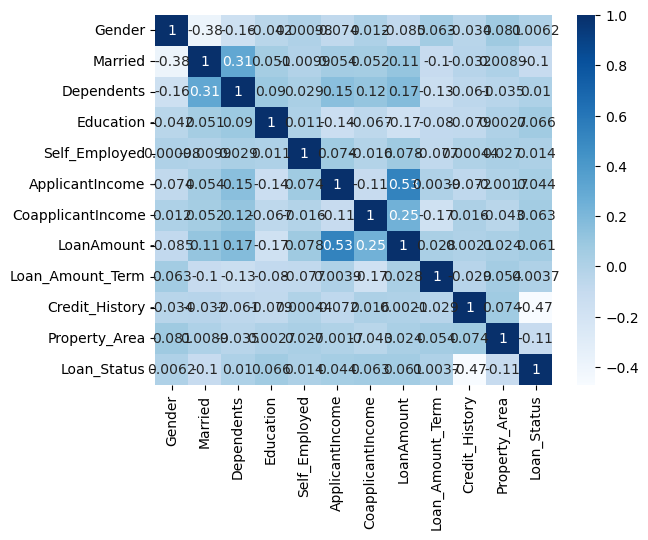

In [37]:
sn.heatmap(dff.corr(),annot=True,cmap='Blues')
plt.show()

#### from above we find that column gender, Loan_Amount_Term,Self_employed is least correlated. hence drop them

In [38]:
dff=dff.drop(['Loan_Amount_Term','Gender','Self_Employed'],axis=1)
dff

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,0,0,5849,0.0,146.0,1.0,0,0
2,1,0,0,3000,0.0,66.0,1.0,0,0
3,1,0,1,2583,2358.0,120.0,1.0,0,0
4,0,0,0,6000,0.0,141.0,1.0,0,0
5,1,2,0,5417,4196.0,267.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
597,0,0,0,2987,0.0,88.0,0.0,2,1
73,1,3,1,4755,0.0,95.0,0.0,2,1
23,1,2,1,3365,1917.0,112.0,0.0,1,1
128,1,1,0,10513,3850.0,160.0,0.0,0,1


#### Distribution plots

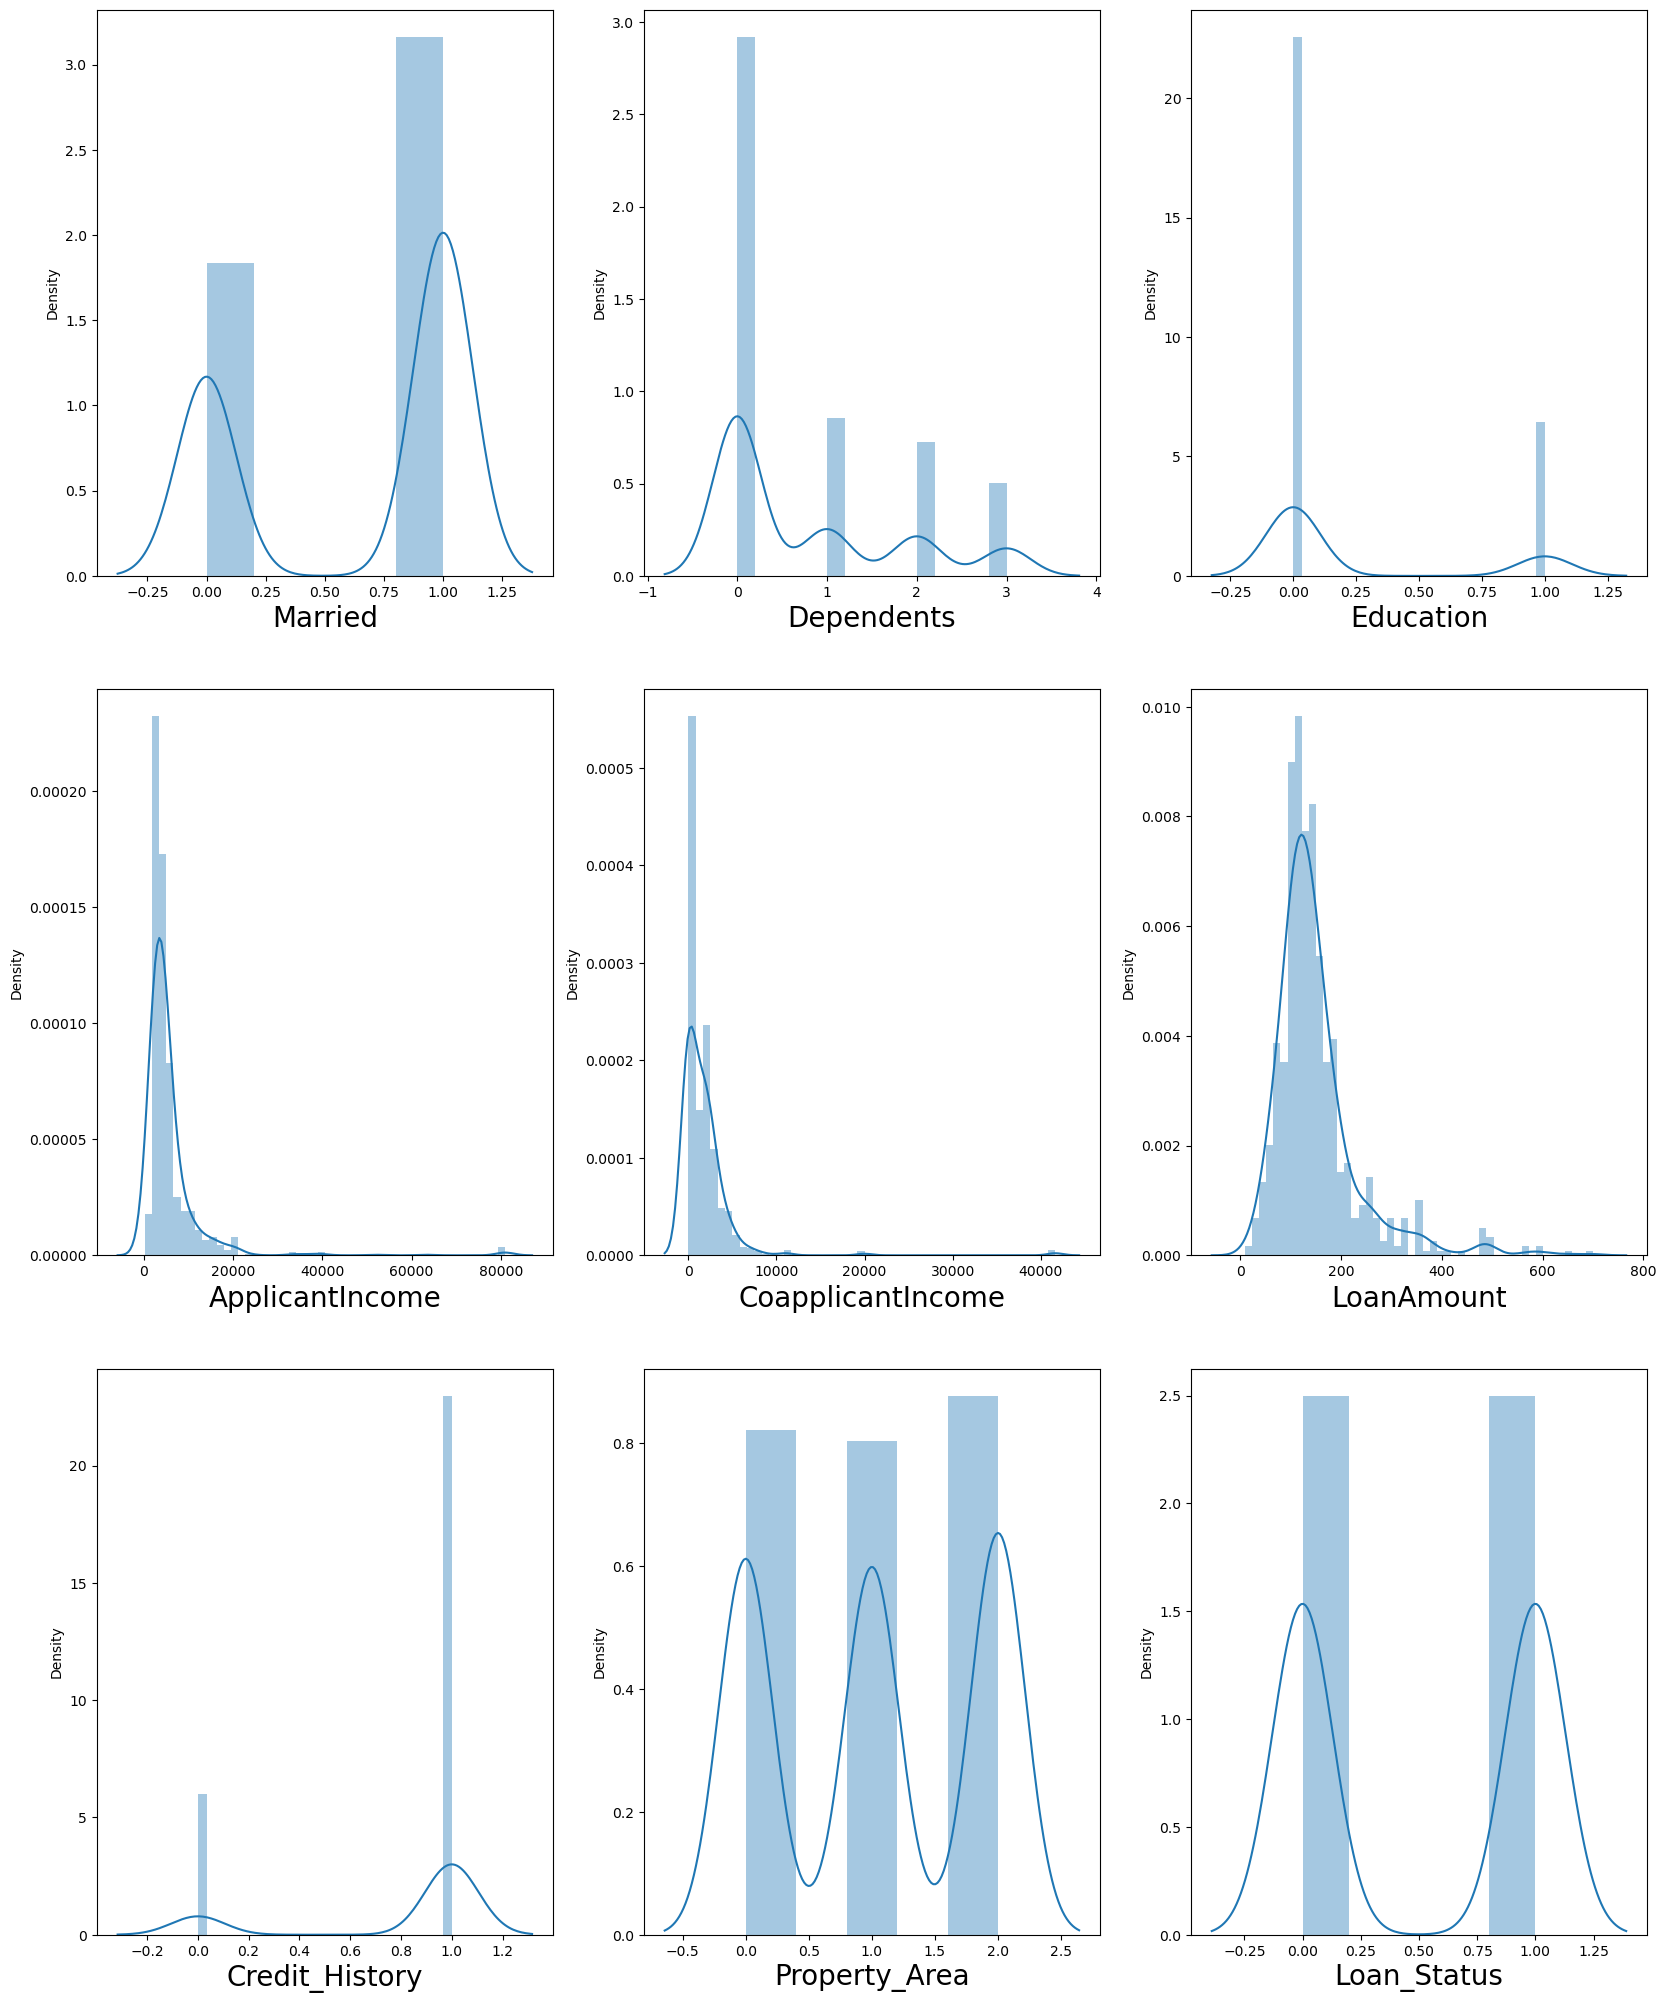

In [39]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(3,3,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

columns having bimodal distribution plot: credit_history, property_area, loanamount, education, dependents, married
rest all columns have almost normal distribution plot being positively skewed

#### outliers check

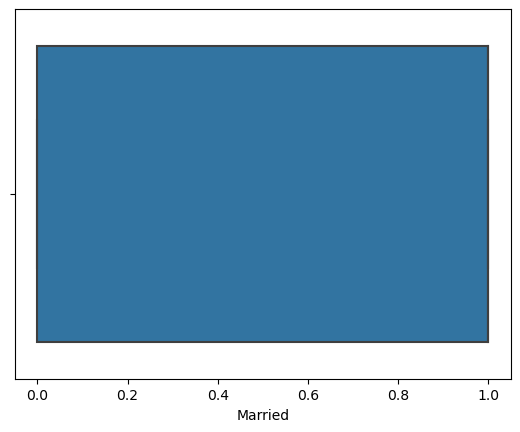

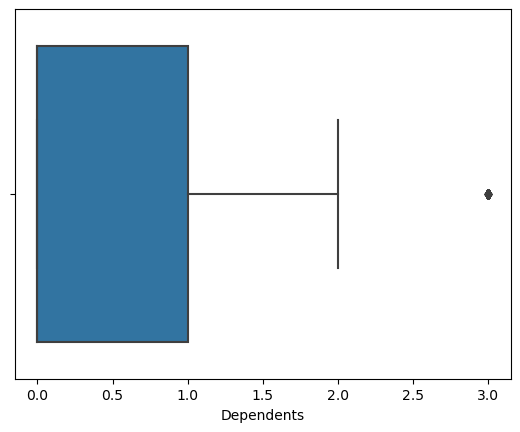

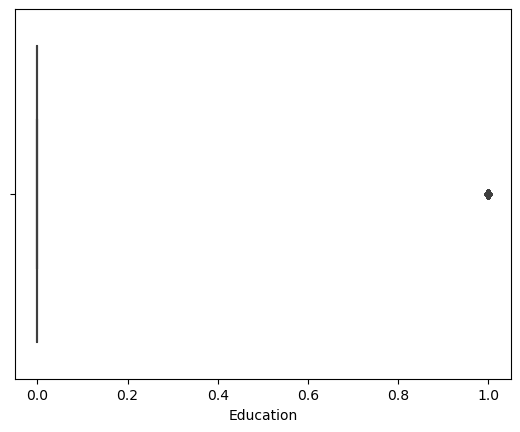

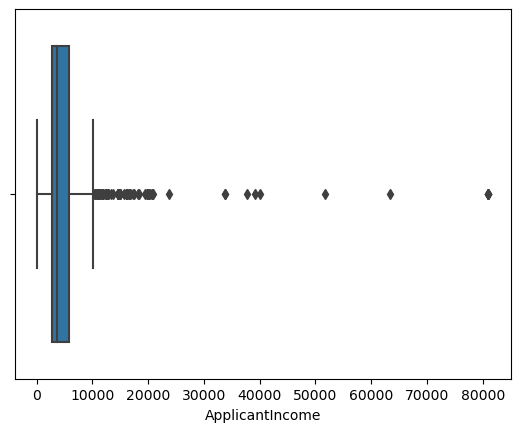

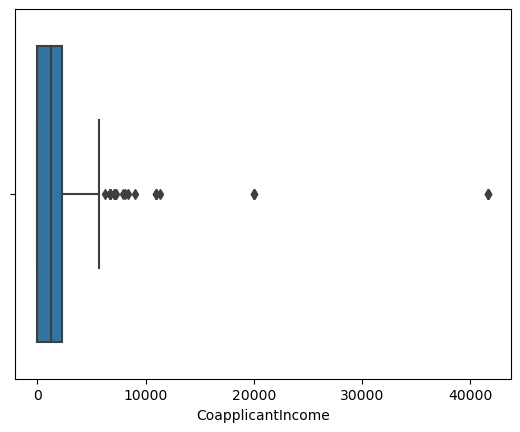

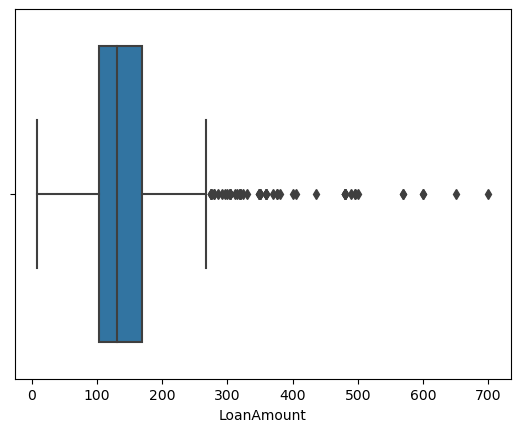

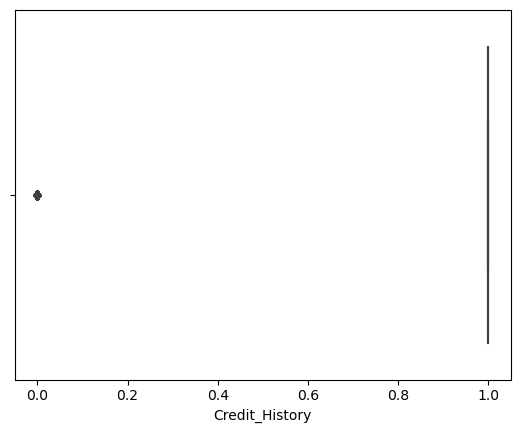

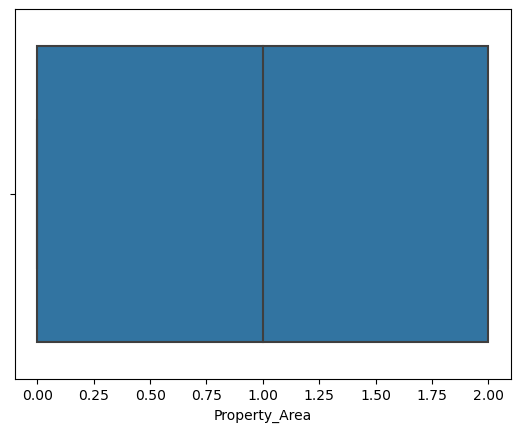

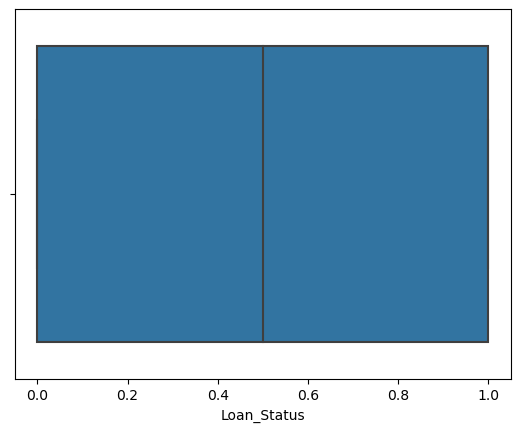

In [42]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

##### Removing Outliers using z-score

In [43]:
z_scr=zscore(dff)
print(dff.shape)
df_new=dff.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(844, 9)
(810, 9)


In [44]:
((844-810)/844)*100

4.028436018957346

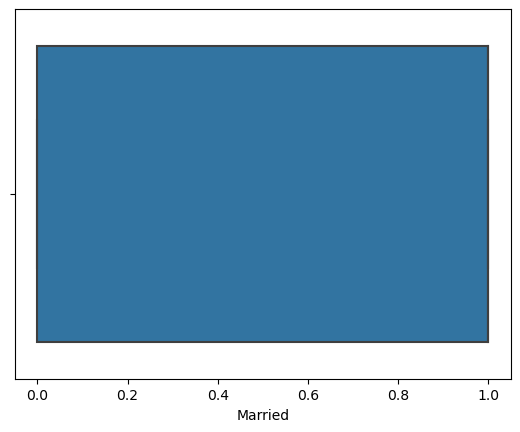

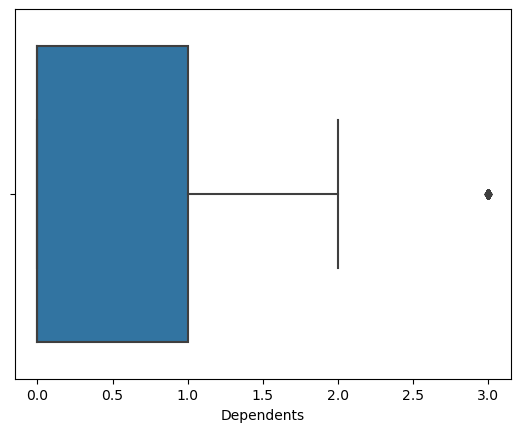

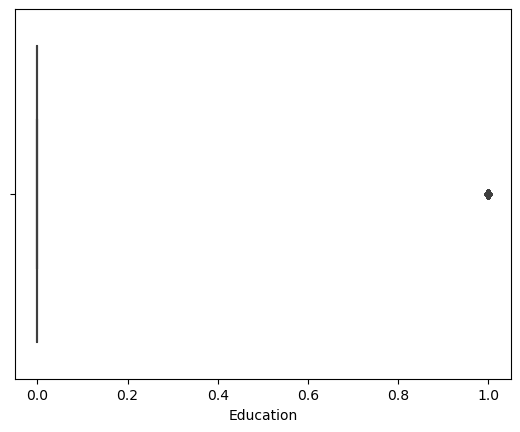

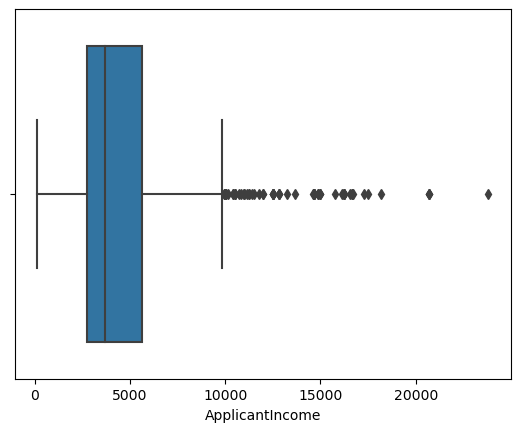

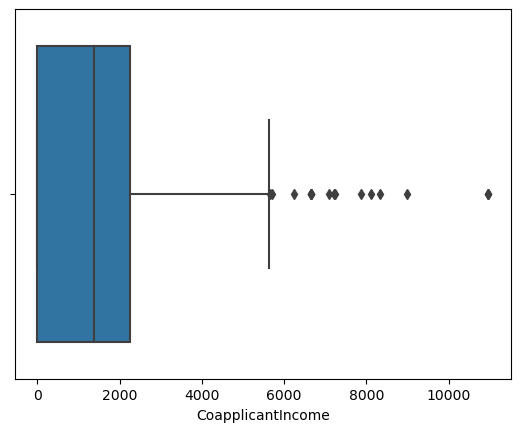

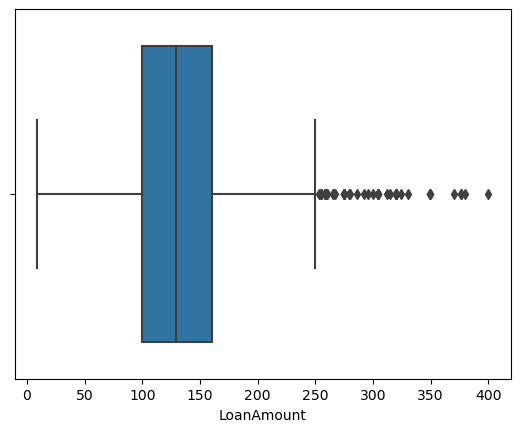

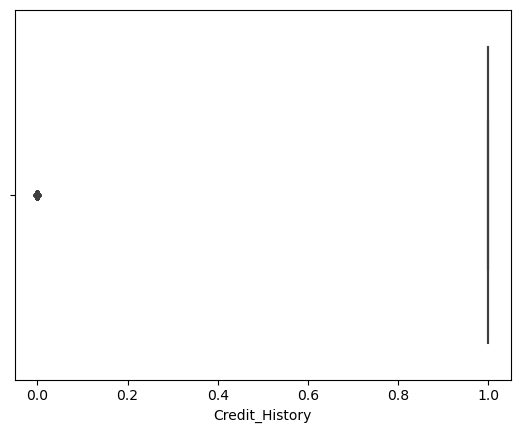

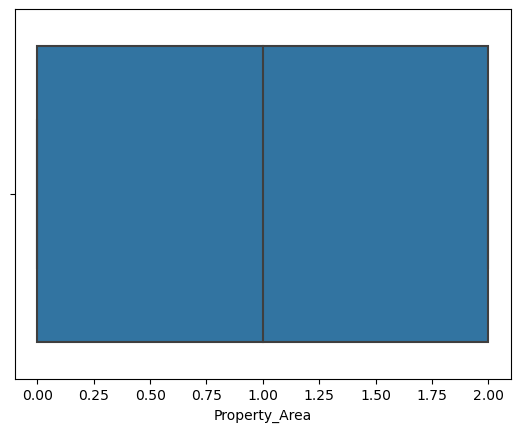

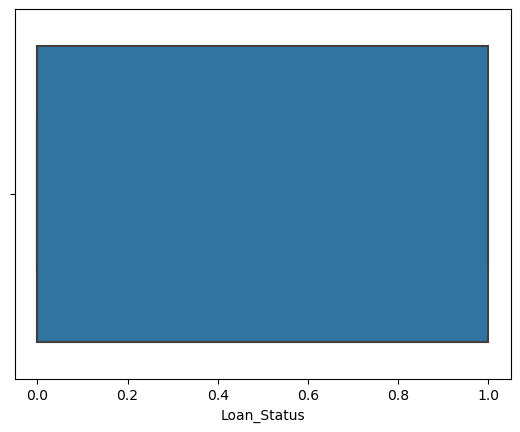

In [46]:
for i in df_new.columns:
    sn.boxplot(df_new[i])
    plt.show()

In [47]:
z_scr=zscore(df_new)
print(df_new.shape)
df=df_new.loc[(abs(z_scr)<3).all(axis=1)]
print(df.shape)

(810, 9)
(757, 9)


#### we cannot remove any more outliers as after the above iteration, data loss of more than 10% will occur

In [49]:
y = df[['Loan_Status']]
x = df.drop(columns = ['Loan_Status'])

#### Skewness check

In [50]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Married             -0.534244
Dependents           1.077285
Education            1.200398
ApplicantIncome      1.460070
CoapplicantIncome    0.838095
LoanAmount           0.700754
Credit_History      -1.436344
Property_Area       -0.037028
dtype: float64
5


In [51]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [52]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

Married             -0.534244
Dependents           0.496947
Education            1.200398
ApplicantIncome      0.420081
CoapplicantIncome   -0.105175
LoanAmount          -0.298122
Credit_History      -1.436344
Property_Area       -0.037028
dtype: float64
1


#### Feature Scaling(non-categorical)

In [53]:
scaler = StandardScaler()
x[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = scaler.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
x

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,0,0.000000,0.0,0.868659,-1.112327,0.389053,1.0,0
2,1,0.000000,0.0,-0.517224,-1.112327,-1.481776,1.0,0
3,1,0.000000,1.0,-0.787788,0.896815,-0.120084,1.0,0
4,0,0.000000,0.0,0.927924,-1.112327,0.296138,1.0,0
5,1,1.259921,0.0,0.693264,1.322350,2.182325,1.0,0
...,...,...,...,...,...,...,...,...
597,0,0.000000,0.0,-0.525267,-1.112327,-0.860325,0.0,2
73,1,1.442250,1.0,0.405398,-1.112327,-0.684697,0.0,2
23,1,1.259921,1.0,-0.300310,0.762826,-0.291428,0.0,1
128,1,1.000000,0.0,2.367951,1.253500,0.638412,0.0,0


#### performing pca and choose appropriate component to train model

In [54]:
for i in range(2,9):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    print(i,sum(pca.explained_variance_ratio_))

2 0.5883134975933819
3 0.7371581146454249
4 0.8234945865480503
5 0.8959550552099679
6 0.9348449660598064
7 0.9679896613552074
8 0.9999999999999999


In [55]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)

##### Finding best Random state

In [61]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

#### Model evaluation

In [56]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [62]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(principalComponents,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.7418474367133044
roc 0.7172557172557172
diff 0.024591719457587202
roc bigger
**********
DecisionTreeClassifier()
score 0.8354727866462308
roc 0.844074844074844
diff 0.008602057428613197
**********
KNeighborsClassifier()
score 0.7651975309748525
roc 0.737006237006237
diff 0.028191293968615527
roc bigger
**********
RandomForestClassifier()
score 0.9189229236317138
roc 0.9277546777546779
diff 0.008831754122964108
roc bigger
**********
SVC()
score 0.7684147627626551
roc 0.7713097713097714
diff 0.002895008547116329
**********
RidgeClassifier()
score 0.7413006599802215
roc 0.7236659736659737
diff 0.017634686314247805
**********
BaggingClassifier()
score 0.9081520852566574
roc 0.9014206514206514
diff 0.00673143383600594
**********
GradientBoostingClassifier()
score 0.8866138144705669
roc 0.8743936243936243
diff 0.012220190076942528
roc bigger
**********
SGDClassifier()
score 0.710361420585766
roc 0.716042966042966
diff 0.00568154545720001
**********
LGB

#### ExtraTreesClassifier is best model

#### Hyperparameter tuning

In [63]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[2,8,16,32,50],'class_weight':['balanced', 'balanced_subsample']}
clf = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5,scoring="roc_auc",n_jobs=-1, verbose=1)
clf.fit(principalComponents,y)
clf.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   26.0s finished


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto'}

In [64]:
besttrain(ExtraTreesClassifier(max_depth=50,criterion='entropy',max_features='auto',class_weight='balanced'),principalComponents,y)

maximum roc_auc_score is at random state : 88  and it is : 0.9476784476784477


##### Fit the best model

In [65]:
x_train, x_test, y_train, y_test = train_test_split(principalComponents, y,random_state = 47,test_size=0.20,stratify=y)
classmodel=ExtraTreesClassifier(max_depth=50,criterion='entropy',max_features='auto',class_weight='balanced')
classmodel.fit(x_train,y_train)

ExtraTreesClassifier(class_weight='balanced', criterion='entropy', max_depth=50)

In [66]:
y_pred=classmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[73  5]
 [ 4 70]]
f1 score is :  0.9395973154362416
classification report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        78
           1       0.93      0.95      0.94        74

    accuracy                           0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152

AUC ROC Score:  0.940921690921691
CV mean 0.9536258786258787
std: 0.02092970806927135


#### Test on whole dataset

In [67]:
y_pred=classmodel.predict(principalComponents)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(classmodel,principalComponents,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[382   5]
 [  4 366]]
f1 score is :  0.9878542510121457
classification report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       387
           1       0.99      0.99      0.99       370

    accuracy                           0.99       757
   macro avg       0.99      0.99      0.99       757
weighted avg       0.99      0.99      0.99       757

AUC ROC Score:  0.9881346462741812
CV mean 0.953926028926029
std: 0.01888423992615747


#### AUC_ROC Curve

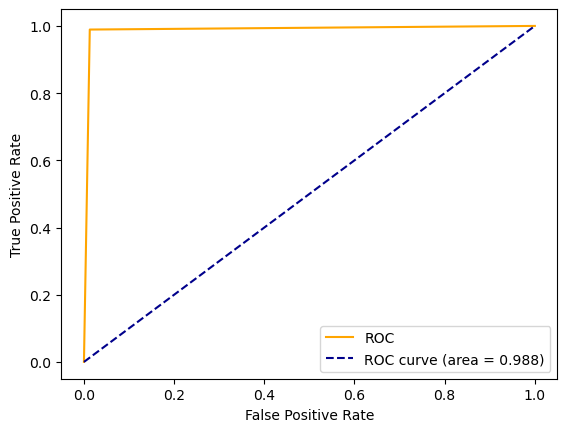

In [68]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### put loan status column and predicted loan status column side by side to observe the diff between these two columns

In [69]:
x['Loan_Statuspred']=y_pred
x['Loan_Status']=y
x[['Loan_Status','Loan_Statuspred']]

,Loan_Status,Loan_Statuspred
0,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
597,1,1
73,1,1
23,1,1
128,1,1


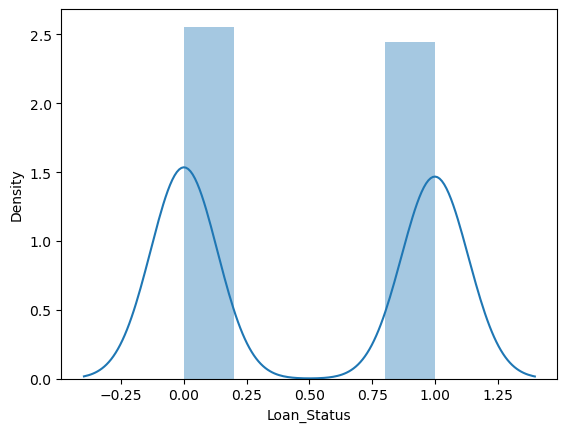

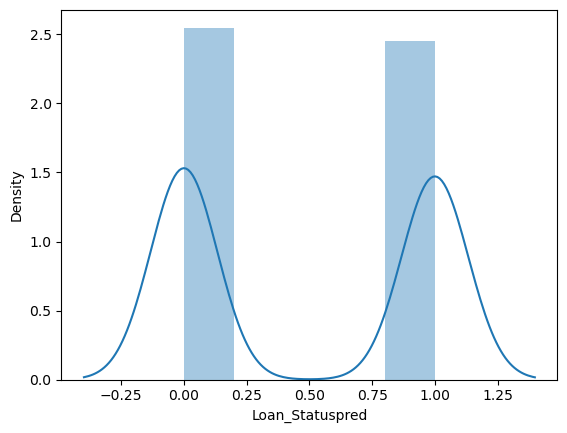

In [73]:
sn.distplot(x['Loan_Status'])
plt.show()
sn.distplot(x['Loan_Statuspred'])
plt.show()

In [74]:
x.Loan_Status.value_counts()

0    387
1    370
Name: Loan_Status, dtype: int64

In [75]:
x.Loan_Statuspred.value_counts()

0    386
1    371
Name: Loan_Statuspred, dtype: int64

##### Saving the model

In [76]:
joblib.dump(classmodel, 'loan_status.pkl')

['loan_status.pkl']